# Feature Scaling is a technique to standardize the independent features present in the data in the fixed range

## Types of Feature Scaling
1. Standardization (Z-Score Normalization)
2. Normalization (MinMax Scaling)

## Standardization (Z-Score Normalization):
The data will be scaled between -1 to 1 <br>
The mean and the standard deviation of the scaled column will become 0 and 1 respectively

Formula: 

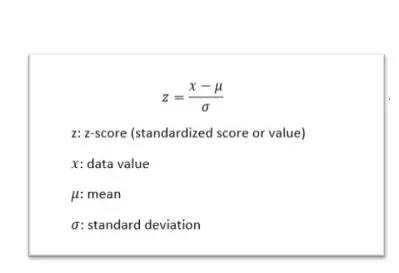

Image Source: https://medium.com/@abhimore822/standardization-64342834c8d5

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Data/Social_Network_Ads.csv")
df = df.iloc[:,2:]
df.sample(5)

,Age,EstimatedSalary,Purchased
253,37,146000,1
283,52,21000,1
301,48,74000,1
235,46,79000,1
159,32,135000,1


In [3]:
# Splitting the data into independent and dependent features x and y respectively
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [4]:
# split the data into train and test before performing standardization
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# checking the shape of train and test data
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [5]:
from sklearn.preprocessing import StandardScaler

# creating a scaler object
scaler = StandardScaler()

# fit method is used to learn the patterns from the data
scaler.fit(X_train)

# transform method is used to apply the transformation on the data based on the learnings from the pattern
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# NOTE: the transform method will return the numpy array

In [6]:
# mean of transformed Age and EstimatedSalary features 
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [7]:
# converting the numpy array into the dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_test.columns)

## Effects of Standardization

In [8]:
print("Before Scaling")
np.round(X_train.describe(), 1)

Before Scaling


,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [9]:
print("After Scaling")
np.round(X_train_scaled.describe(), 1)

After Scaling


,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


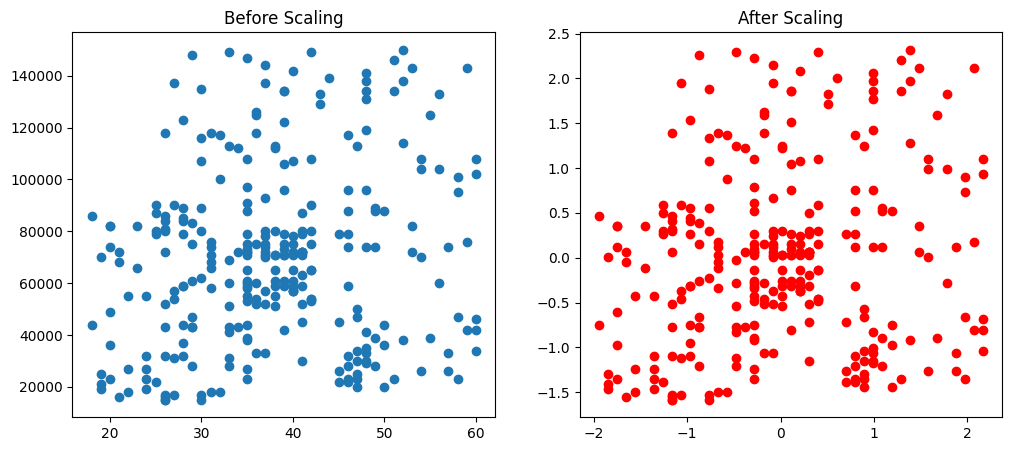

In [10]:
# scatter plot before and after applying standardization

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.set_title("Before Scaling")
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])

ax2.set_title("After Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color = 'red')

plt.show()

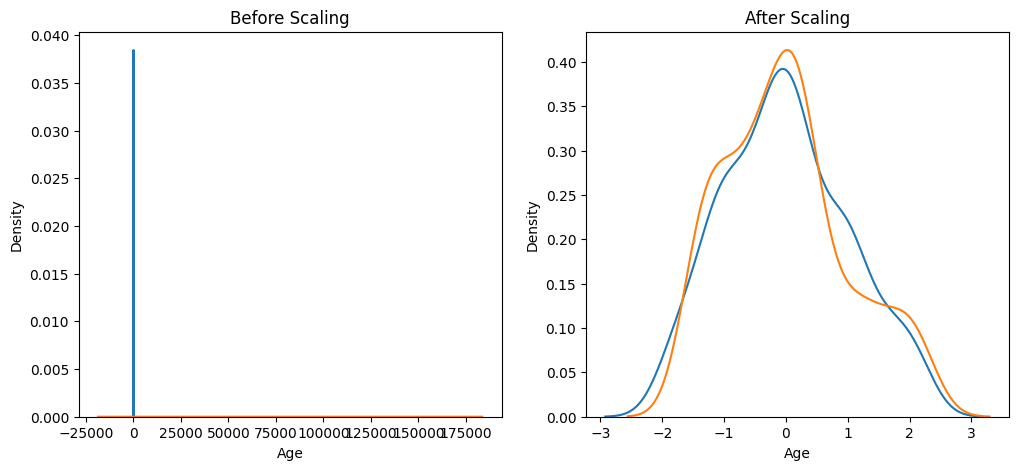

In [11]:
# KDE plot also called Kernel Density Estimate
# KDE plot takes each individual value and draws a gaussian bell curve over it

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax = ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'], ax = ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax = ax2)

plt.show()

## Normalization (MinMAX Scaling)
The data will be scaled between 0 to 1 <br>
The min and max value of the scaled column will be 0 and 1 respectively

Formula:

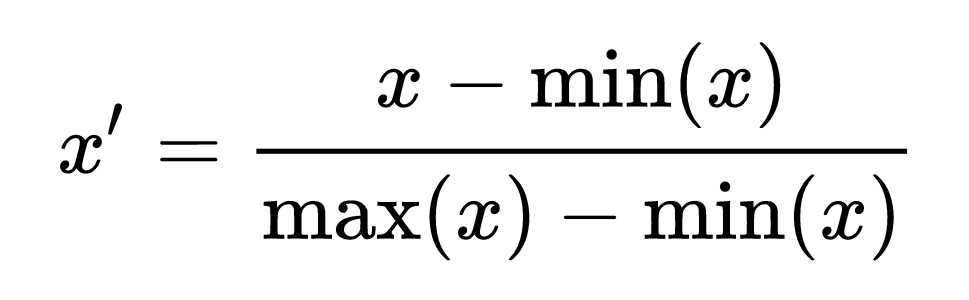

Image Source: https://pub.aimind.so/mastering-feature-scaling-unleashing-the-power-of-normalization-part-2-dd3b77616f05

In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("Data/wine_data.csv", header = None, usecols=[0,1,2])
df.columns = ["Class label", "Alcohol", "Malic Acid"]

In [14]:
df.sample(5)

,Class label,Alcohol,Malic Acid
120,2,11.45,2.40
122,2,12.42,4.43
147,3,12.87,4.61
2,1,13.16,2.36
59,2,12.37,0.94


<Axes: xlabel='Alcohol', ylabel='Malic Acid'>

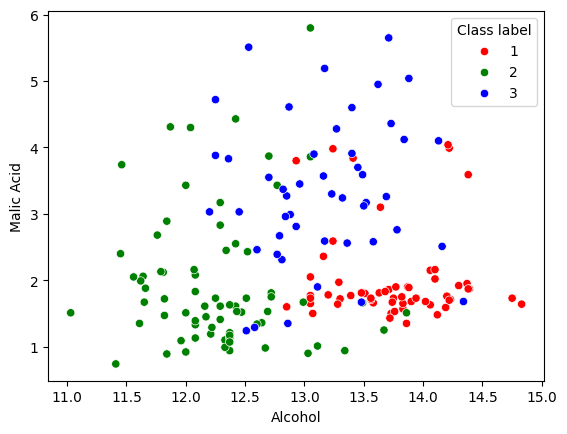

In [15]:
color_dict = {
    1: 'red',
    2: 'green',
    3: 'blue'
}

sns.scatterplot(x='Alcohol', y='Malic Acid', hue='Class label', palette=color_dict, data=df)

In [16]:
# Splitting the data into independent and dependent features x and y respectively
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [17]:
# split the data into train and test before performing normalization
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# checking the shape of the train and test data
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [18]:
from sklearn.preprocessing import MinMaxScaler

# creating a scaler object
scaler = MinMaxScaler()

# fit method is used to learn the patterns from the data
scaler.fit(X_train)

# transform method is used to apply the transformation on the data based on the learnings from the pattern
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# NOTE: the transform method will return the numpy array

In [19]:
# converting the numpy array into the dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

## Effects of Scaling

In [20]:
print("Before Scaling")
np.round(X_train.describe(), 1)

Before Scaling


,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [21]:
print("After Scaling")
np.round(X_train_scaled.describe(), 1)

After Scaling


,Alcohol,Malic Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


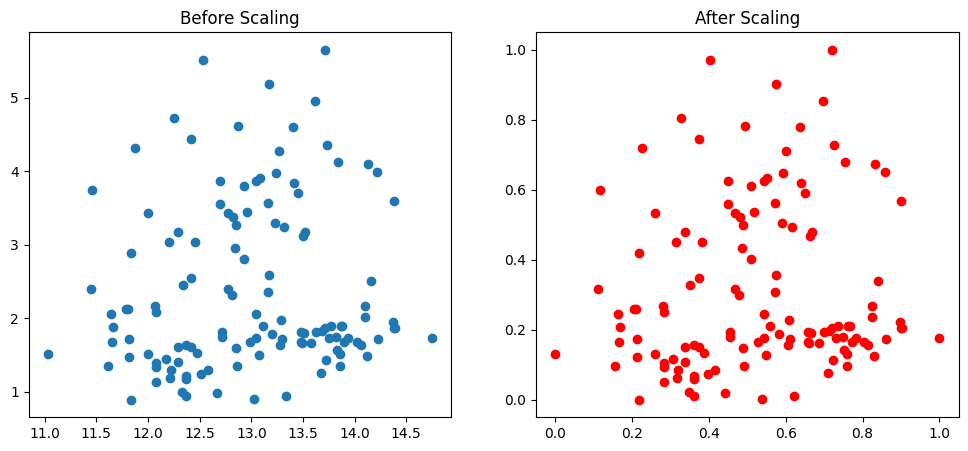

In [22]:
# scatter plot before and after applying Normalization

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.set_title("Before Scaling")
ax1.scatter(X_train['Alcohol'], X_train['Malic Acid'])

ax2.set_title("After Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic Acid'], color = 'red')

plt.show()

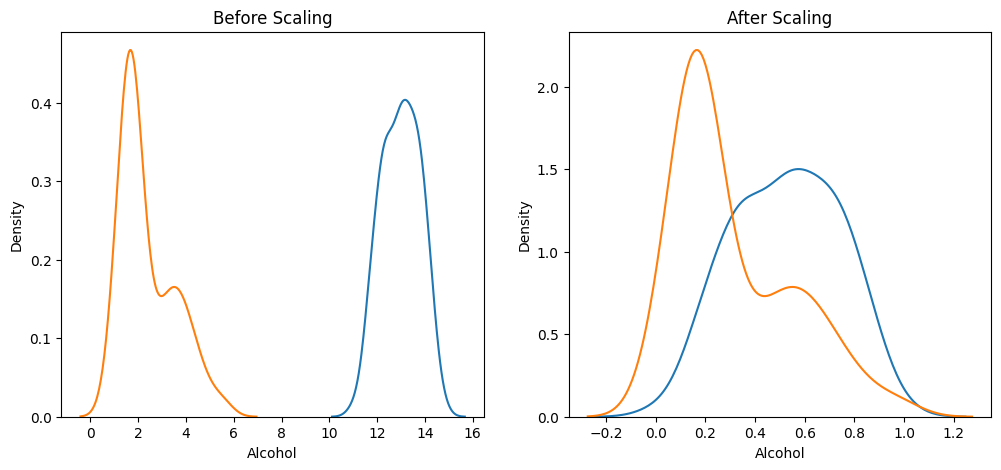

In [23]:
# KDE plot also called Kernel Density Estimate
# KDE plot takes each individual value and draws a gaussian bell curve over it

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'], ax = ax1)
sns.kdeplot(X_train['Malic Acid'], ax = ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Alcohol'], ax = ax2)
sns.kdeplot(X_train_scaled['Malic Acid'], ax = ax2)

plt.show()